# HW2 Policy Gradients 

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0' # 0 is default GPU

In [2]:
import tensorflow as tf

print(tf.__version__)

1.14.0


In [5]:
import train_pg_f18 as pg

import sys, os
import datetime as dt


In [16]:
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
# path=os.environ['PATH']
# %env PATH='/usr/local/bin:'+path

command_list = [
    'python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 -dna --exp_name   sb_no_rtg_dna',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 -rtg -dna --exp_name   sb_rtg_dna',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 -rtg --exp_name   sb_rtg_na',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 -dna --exp_name   lb_no_rtg_dna',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 -rtg -dna --exp_name   lb_rtg_dna',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 -rtg --exp_name   lb_rtg_na',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 --exp_name   sb_no_rtg_na',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 --exp_name   lb_no_rtg_na',
]

for command in command_list :
    sys.argv = command.split()[1:]
    print('starts train ', sys.argv, ' at', dt.datetime.now())
    pg.main()
    print('finished train ', sys.argv, ' at', dt.datetime.now())

print('finished train on all command list at', dt.datetime.now())

starts train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '5000', '-e', '3', '-rtg', '--exp_name', 'lb_rtg_na']  at 2019-08-09 18:43:10.773836
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '5000', '-e', '3', '-rtg', '--exp_name', 'lb_rtg_na']  at 2019-08-09 18:45:29.236729
starts train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '--exp_name', 'sb_no_rtg_na']  at 2019-08-09 18:45:29.236729
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '--exp_name', 'sb_no_rtg_na']  at 2019-08-09 18:46:07.472122
starts train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '5000', '-e', '3', '--exp_name', 'lb_no_rtg_na']  at 2019-08-09 18:46:07.474069
Running experiment with seed 1
Running experiment with s

In [17]:
data_dir = os.path.join('.', 'data')

lb_path_list = [] # large batch files
sb_path_list = [] # small batch files

if os.path.isdir(data_dir) :
    for f in os.listdir(data_dir) :
        if f.startswith('lb_') :
            lb_path_list.append('data/' + f)
        elif f.startswith('sb_') :
            sb_path_list.append('data/' + f)

print(lb_path_list)
print(sb_path_list)

['data/lb_no_rtg_dna_CartPole-v0_09-08-2019_18-35-09', 'data/lb_no_rtg_na_CartPole-v0_09-08-2019_18-46-07', 'data/lb_rtg_dna_CartPole-v0_09-08-2019_18-37-40', 'data/lb_rtg_na_CartPole-v0_09-08-2019_18-43-10']
['data/sb_no_rtg_dna_CartPole-v0_09-08-2019_18-33-22', 'data/sb_no_rtg_na_CartPole-v0_09-08-2019_18-45-29', 'data/sb_rtg_dna_CartPole-v0_09-08-2019_18-33-59', 'data/sb_rtg_na_CartPole-v0_09-08-2019_18-34-34']


starts plot  ['plot.py', 'data/sb_no_rtg_dna_CartPole-v0_09-08-2019_18-33-22', '--value', 'AverageReturn']  at 2019-08-09 18:50:29.273789


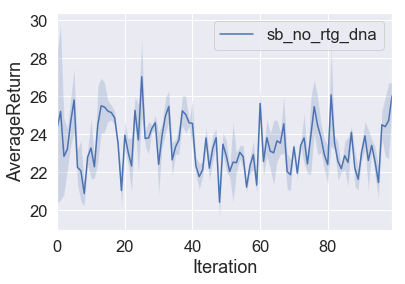

finished plot  ['plot.py', 'data/sb_no_rtg_dna_CartPole-v0_09-08-2019_18-33-22', '--value', 'AverageReturn']  at 2019-08-09 18:50:29.513152
starts plot  ['plot.py', 'data/sb_no_rtg_na_CartPole-v0_09-08-2019_18-45-29', '--value', 'AverageReturn']  at 2019-08-09 18:50:29.513152


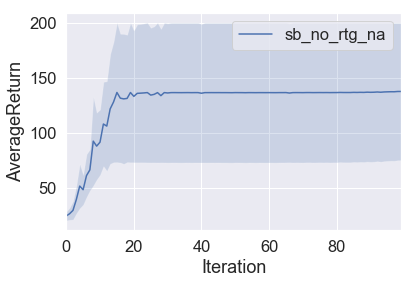

finished plot  ['plot.py', 'data/sb_no_rtg_na_CartPole-v0_09-08-2019_18-45-29', '--value', 'AverageReturn']  at 2019-08-09 18:50:29.766471
starts plot  ['plot.py', 'data/sb_rtg_dna_CartPole-v0_09-08-2019_18-33-59', '--value', 'AverageReturn']  at 2019-08-09 18:50:29.767468


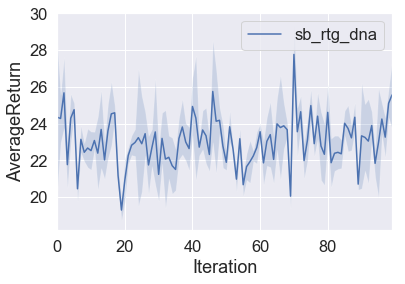

finished plot  ['plot.py', 'data/sb_rtg_dna_CartPole-v0_09-08-2019_18-33-59', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.038744
starts plot  ['plot.py', 'data/sb_rtg_na_CartPole-v0_09-08-2019_18-34-34', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.038744


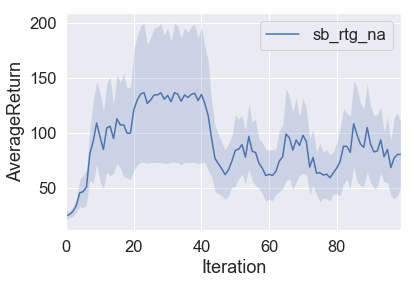

finished plot  ['plot.py', 'data/sb_rtg_na_CartPole-v0_09-08-2019_18-34-34', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.237211
starts plot  ['plot.py', 'data/lb_no_rtg_dna_CartPole-v0_09-08-2019_18-35-09', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.238208


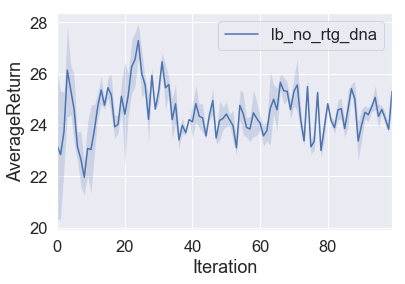

finished plot  ['plot.py', 'data/lb_no_rtg_dna_CartPole-v0_09-08-2019_18-35-09', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.521498
starts plot  ['plot.py', 'data/lb_no_rtg_na_CartPole-v0_09-08-2019_18-46-07', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.521498


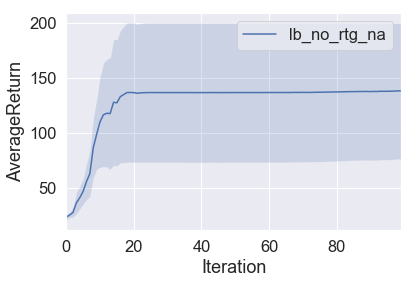

finished plot  ['plot.py', 'data/lb_no_rtg_na_CartPole-v0_09-08-2019_18-46-07', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.757819
starts plot  ['plot.py', 'data/lb_rtg_dna_CartPole-v0_09-08-2019_18-37-40', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.758815


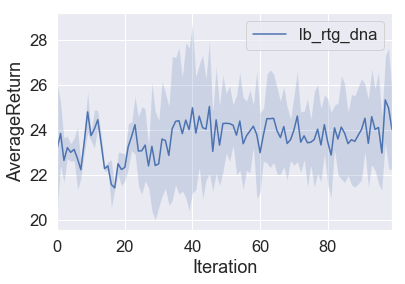

finished plot  ['plot.py', 'data/lb_rtg_dna_CartPole-v0_09-08-2019_18-37-40', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.974244
starts plot  ['plot.py', 'data/lb_rtg_na_CartPole-v0_09-08-2019_18-43-10', '--value', 'AverageReturn']  at 2019-08-09 18:50:30.974244


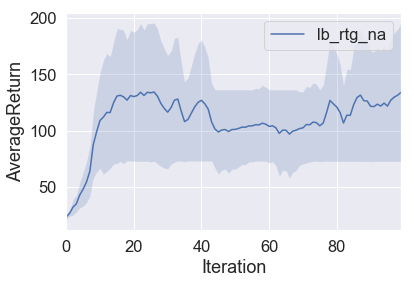

finished plot  ['plot.py', 'data/lb_rtg_na_CartPole-v0_09-08-2019_18-43-10', '--value', 'AverageReturn']  at 2019-08-09 18:50:31.201633
finished plot on all command list at 2019-08-09 18:50:31.202634


In [18]:
import plot

for sb_path in sb_path_list :
    sys.argv = [ 'plot.py', sb_path, '--value', 'AverageReturn' ]
    print('starts plot ', sys.argv, ' at', dt.datetime.now())
    try :
        plot.main()
    except ValueError as e :
        print('error - ', e)
    print('finished plot ', sys.argv, ' at', dt.datetime.now())

for lb_path in lb_path_list :
    sys.argv = [ 'plot.py', lb_path, '--value', 'AverageReturn' ]
    print('starts plot ', sys.argv, ' at', dt.datetime.now())
    try :
        plot.main()
    except ValueError as e :
        print('error - ', e)
    print('finished plot ', sys.argv, ' at', dt.datetime.now())
    
print('finished plot on all command list at', dt.datetime.now())

In [22]:
import numpy as np

def sum_of_rewards(re_n, reward_to_go=True, decay_rate=0.9): # decay_rate <- self.gamma
    """
        Monte Carlo estimation of the Q function.

        let sum_of_path_lengths be the sum of the lengths of the paths sampled from 
            Agent.sample_trajectories
        let num_paths be the number of paths sampled from Agent.sample_trajectories

        arguments:
            re_n: length: num_paths. Each element in re_n is a numpy array 
                containing the rewards for the particular path

        returns:
            q_n: shape: (sum_of_path_lengths). A single vector for the estimated q values 
                whose length is the sum of the lengths of the paths

        ----------------------------------------------------------------------------------

        Your code should construct numpy arrays for Q-values which will be used to compute
        advantages (which will in turn be fed to the placeholder you defined in 
        Agent.define_placeholders). 

        Recall that the expression for the policy gradient PG is

              PG = E_{tau} [sum_{t=0}^T grad log pi(a_t|s_t) * (Q_t - b_t )]

        where 

              tau=(s_0, a_0, ...) is a trajectory,
              Q_t is the Q-value at time t, Q^{pi}(s_t, a_t),
              and b_t is a baseline which may depend on s_t. 

        You will write code for two cases, controlled by the flag 'reward_to_go':

          Case 1: trajectory-based PG 

              (reward_to_go = False)

              Instead of Q^{pi}(s_t, a_t), we use the total discounted reward summed over 
              entire trajectory (regardless of which time step the Q-value should be for). 

              For this case, the policy gradient estimator is

                  E_{tau} [sum_{t=0}^T grad log pi(a_t|s_t) * Ret(tau)]

              where

                  Ret(tau) = sum_{t'=0}^T gamma^t' r_{t'}.

              Thus, you should compute

                  Q_t = Ret(tau)

          Case 2: reward-to-go PG 

              (reward_to_go = True)

              Here, you estimate Q^{pi}(s_t, a_t) by the discounted sum of rewards starting
              from time step t. Thus, you should compute

                  Q_t = sum_{t'=t}^T gamma^(t'-t) * r_{t'}


        Store the Q-values for all timesteps and all trajectories in a variable 'q_n',
        like the 'ob_no' and 'ac_na' above. 
    """

    num_paths = len(re_n) # num_paths means number of trajectories
    q_n = []

    for re in re_n : 
        if reward_to_go:
            gamma = 1.0
            next_sum = 0.0

            sub_q = np.empty(len(re))
            for t in reversed(range(len(re))) :
                sub_q[t] = next_sum + re[t]
                # print('sub_q[', t, ']=', sub_q[t])
                next_sum = sub_q[t] * decay_rate

            for q_t in sub_q :
                q_n.append(q_t)
        else:
            gamma = 1.0
            total = 0.0
            for t in range(len(re)) :
                total += gamma * re[t]
                gamma *= decay_rate

            # print('q=', total)
            for _ in range(len(re)) :
                q_n.append(total)

    # print('sum of path lengths :', np.shape(q_n))
    return q_n


In [23]:
adv_n = []
adv_n.append([32768.0, 16384.0, 8192.0, 4096.0, 2048.0, 1024.0, 512.0, 256.0, 128.0, 64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0, 137438953472.0, 68719476736.0, 34359738368.0, 17179869184.0, 8589934592.0, 4294967296.0, 2147483648.0, 1073741824.0, 536870912.0, 268435456.0, 134217728.0, 67108864.0, 33554432.0, 16777216.0, 8388608.0, 4194304.0, 2097152.0, 1048576.0, 524288.0, 262144.0, 131072.0, 65536.0, 32768.0, 16384.0, 8192.0, 4096.0, 2048.0, 1024.0, 512.0, 256.0, 128.0, 64.0, 32.0, 16.0])
adv_n.append([8.0, 4.0, 2.0, 1.0, 2097152.0, 1048576.0, 524288.0, 262144.0, 131072.0, 65536.0, 32768.0, 16384.0, 8192.0, 4096.0, 2048.0, 1024.0, 512.0, 256.0, 128.0, 64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0, 32768.0, 16384.0, 8192.0, 4096.0, 2048.0, 1024.0, 512.0, 256.0, 128.0, 64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0, 68719476736.0, 34359738368.0, 17179869184.0, 8589934592.0, 4294967296.0, 2147483648.0, 1073741824.0, 536870912.0])

sum1 = sum_of_rewards(adv_n, reward_to_go=True)
sum2 = sum_of_rewards(adv_n, reward_to_go=False)

print('sum1:', sum1, ', length:', len(sum1))
print('sum2:', sum2, ', length:', len(sum2))

'''
print('reward to go in reverse order')
print(512)
print(1024 + 0.9 * 512)
print(2048 + 0.9 * 1024 + 0.9 * 0.9 * 512)
print('normal')
print(32768 + 16384 * 0.9 + 8192 * 0.9 * 0.9 + 4096 * 0.9 * 0.9 * 0.9 + 2048 * 0.9 * 0.9 * 0.9 * 0.9 + 1024 * 0.9 * 0.9 * 0.9 * 0.9 * 0.9 + 512 * 0.9 * 0.9 * 0.9 * 0.9 * 0.9 * 0.9)
'''

sum1: [46304996944.89929, 51449960196.55477, 57166604236.17197, 63518440049.07996, 70576039947.86662, 78417819888.74069, 87130909849.71188, 96812121486.34653, 107569023589.27391, 119521137179.19324, 132801263461.32582, 147556959365.91757, 163952177055.46396, 182169085608.29327, 202410095115.8814, 224900105682.09045, 249889006312.32272, 124944503155.91414, 62472251577.68237, 31236125788.535973, 15618062893.928856, 7809031446.587618, 3904515722.8751307, 1952257860.9723675, 976128929.9692972, 488064464.4103302, 244032231.56703356, 122016115.07448173, 61008056.749424145, 30504027.49936016, 15252012.777066842, 7626005.307852047, 3813001.453168941, 1906499.3924099347, 953248.2137888162, 476622.4597653514, 238309.39973927927, 119152.66637697697, 59574.07375219664, 29784.5263913296, 14889.473768144, 7441.63752016, 3717.3750224, 1854.861136, 923.17904, 456.8656, 223.184, 105.75999999999999, 46.4, 16.0, 1495890161.4359117, 1662100170.4843462, 1846777962.7603846, 2051975511.9559827, 2279972789.95

"\nprint('reward to go in reverse order')\nprint(512)\nprint(1024 + 0.9 * 512)\nprint(2048 + 0.9 * 1024 + 0.9 * 0.9 * 512)\nprint('normal')\nprint(32768 + 16384 * 0.9 + 8192 * 0.9 * 0.9 + 4096 * 0.9 * 0.9 * 0.9 + 2048 * 0.9 * 0.9 * 0.9 * 0.9 + 1024 * 0.9 * 0.9 * 0.9 * 0.9 * 0.9 + 512 * 0.9 * 0.9 * 0.9 * 0.9 * 0.9 * 0.9)\n"